# MyoSuite Tutorial 2024
## Extension of the [MyoSuite ICRA 2023 tutorial](https://colab.research.google.com/drive/1KGqZgSYgKXF-vaYC33GR9llDsIW9Rp-q#scrollTo=Vok_qwSXlI8n)
This is an advanced tutorial, please, start with the ICRA 2023 tutorial before advancing with the current one
> This source code is licensed under the Apache license found in the [LICENSE](https://github.com/myohub/myosuite/blob/main/LICENSE) file.


In order to run this netebook you need to:
1. Install all the required package
2. Run the whole sequence of cells

# Installation

In [2]:
!pip install myosuite -q
%env MUJOCO_GL=enable
!pip install matplotlib -q
!pip install stable_baselines3 -q

env: MUJOCO_GL=enable


### Helper method to show the rendering inside the Colab

In [3]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 400):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video autoplay width={video_width} controls><source src="{video_url}"></video>""")


# Define a new Goal / Task
Let's define a new goal for an existing task: achieve a Rock Hand Sign

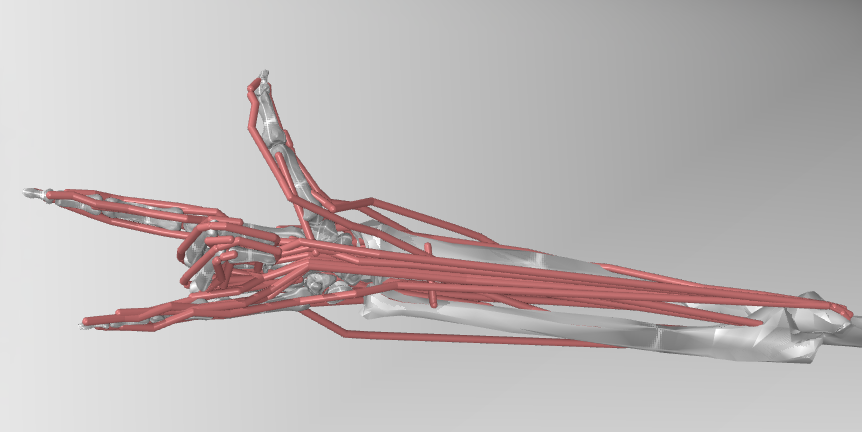

## Register a new environment for the new goal

In [4]:
import numpy as np
import myosuite
from myosuite.envs.env_variants import register_env_variant


base_env_name = "myoHandPoseFixed-v0"

# Register a variant of the Pose env with a new target to reach a RockSign Gesture
QPosRockSign = '0 0 0 0.78 -0.151 0.393983 0.4363 0 0 0 0 1.571 0 1.571 1.571 1.571 0 1.571 1.571 0 0 0 0'.split(' ')

base_env_variants={
    'target_jnt_value': np.array(QPosRockSign,'float'),
}
variant_env_name = register_env_variant(env_id=base_env_name, variants=base_env_variants, variant_id='myoHandPoseRockSignFixed-v0')

pygame 2.6.1 (SDL 2.28.4, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html
MyoSuite:> Registering Myo Envs
Registered a new env-variant: myoHandPoseRockSignFixed-v0


## Train the new task

In [5]:
import numpy as np
from myosuite.utils import gym
import os

env = gym.make('myoHandPoseRockSignFixed-v0')
env.reset()

from stable_baselines3 import PPO
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=100)
# to train to convergence use more iterations e.g.
# model.learn(total_timesteps=1e7)
model.save("RockPose_policy")

    MyoSuite: A contact-rich simulation suite for musculoskeletal motor control
        Vittorio Caggiano, Huawei Wang, Guillaume Durandau, Massimo Sartori, Vikash Kumar
        L4DC-2019 | https://sites.google.com/view/myosuite
    


In [6]:
# find geometries with ID == 1 which indicates the skins
geom_1_indices = np.where(env.sim.model.geom_group == 1)
# Change the alpha value to make it transparent
env.sim.model.geom_rgba[geom_1_indices, 3] = 0

env.sim.renderer.set_viewer_settings(
           render_actuator=True,
           render_tendon=True
       )


# find geometries with ID == 1 which indicates the skins
geom_1_indices = np.where(env.sim.model.geom_group == 1)
# Change the alpha value to make it transparent
env.sim.model.geom_rgba[geom_1_indices, 3] = 0

env.sim.renderer.set_viewer_settings(
           render_actuator=True,
           render_tendon=True
       )

pi = PPO.load("RockPose_policy")
frames = []
for _ in range(100):
    frames.append(env.sim.renderer.render_offscreen(width=400, height=400, camera_id=3))
    o = env.get_obs()
    a = pi.predict(o)[0]
    next_o, r, done, *_, ifo = env.step(
        a
    )  # take an action based on the current observation

import skvideo.io
import os
os.makedirs("videos", exist_ok=True)
# make a local copy
skvideo.io.vwrite(
    "videos/RockPose.mp4",
    np.asarray(frames),
    outputdict={"-pix_fmt": "yuv420p", "-r": "10"},
)


/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_obs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_obs` for environment variables or `env.get_wrapper_attr('get_obs')` that will search the reminding wrappers.
  logger.warn(
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/

In [7]:
from myosuite.utils import gym
import matplotlib.pyplot as plt
env = gym.make('MyoHandDuckInspect-v0')

# find geometries with ID == 1 which indicates the skins
geom_1_indices = np.where(env.sim.model.geom_group == 1)
# Change the alpha value to make it transparent
env.sim.model.geom_rgba[geom_1_indices, 3] = 0
env.reset()
frames = []
for _ in range(env.spec.max_episode_steps):
    env.playback()
    frames.append(env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=2))
env.close()

    MyoDex: A Generalizable Prior for Dexterous Manipulation
        Vittorio Caggiano, Sudeep Dasari, Vikash Kumar
        ICML-2023, https://arxiv.org/abs/2309.03130
    


/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.playback to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.playback` for environment variables or `env.get_wrapper_attr('playback')` that will search the reminding wrappers.
  logger.warn(


In [8]:
import os
import skvideo.io
os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/DuckInspect.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})

# show in the notebook
show_video('videos/DuckInspect.mp4')

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.wr

### Change the position of the Camera

In [9]:
from myosuite.utils.quat_math import euler2quat
env = gym.make('MyoHandDuckInspect-v0')

# find geometries with ID == 1 which indicates the skins
geom_1_indices = np.where(env.sim.model.geom_group == 1)
# Change the alpha value to make it transparent
env.sim.model.geom_rgba[geom_1_indices, 3] = 0

env.unwrapped.sim.model.cam_pos[2,2] = .5
env.unwrapped.sim.model.cam_pos[2,1] = 1

env.reset()
frames = []
for i in range(env.spec.max_episode_steps):
    env.playback()
    frames.append(env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=2))
env.close()

os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/MyoHandDuckInspect_CameraPosition.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})

# show in the notebook
show_video('videos/MyoHandDuckInspect_CameraPosition.mp4')

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.wr

### Rotate the camera during movements

In [10]:
env = gym.make('MyoHandDuckInspect-v0')

# find geometries with ID == 1 which indicates the skins
geom_1_indices = np.where(env.sim.model.geom_group == 1)
# Change the alpha value to make it transparent
env.sim.model.geom_rgba[geom_1_indices, 3] = 0

env.reset()
frames = []
for i in range(env.spec.max_episode_steps):
    env.playback()
    env.unwrapped.sim.model.cam_quat[3,:]+=euler2quat([0,0,2*3.14*i/env.spec.max_episode_steps])
    frames.append(env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=3))
env.close()

os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/MyoHandDuckInspect_Rotate.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})

# show in the notebook
show_video('videos/MyoHandDuckInspect_Rotate.mp4')

/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(vid.tostring())
/Users/justincao/miniconda3/envs/myotap/lib/python3.8/site-packages/skvideo/io/ffmpeg.py:466: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.wr

# Test environment with Fatigue and Recovery

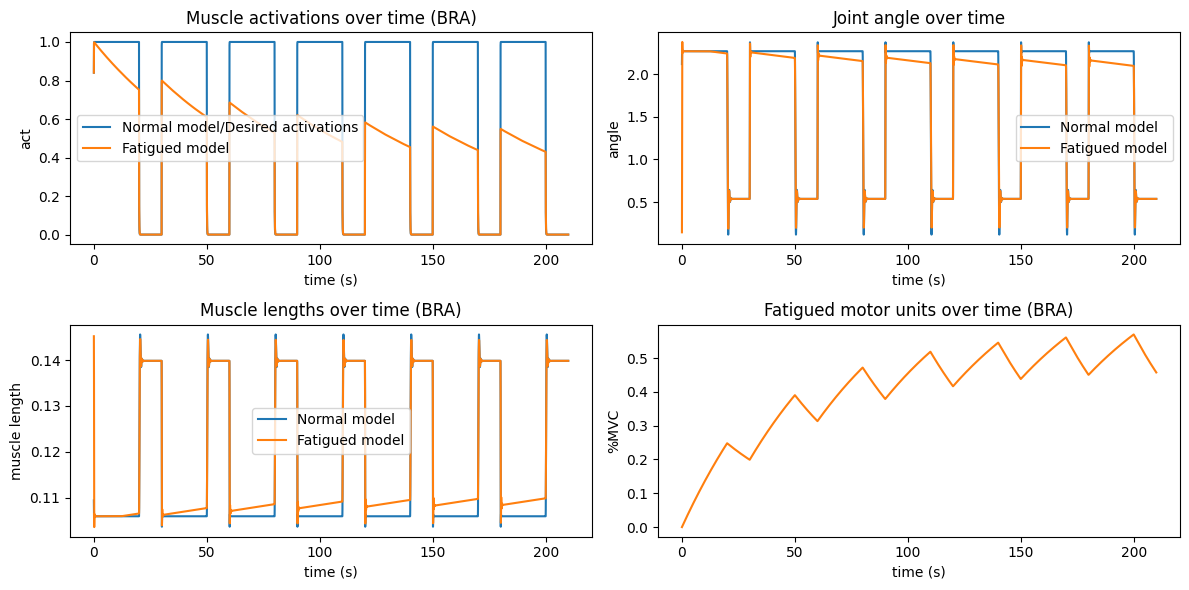

In [11]:
import mujoco
## With Fatigue
envFatigue = gym.make('myoFatiElbowPose1D6MRandom-v0', normalize_act=False)

## Without Fatigue
env = gym.make('myoElbowPose1D6MRandom-v0', normalize_act=False)

envFatigue.unwrapped.muscle_fatigue.set_RecoveryMultiplier(10)
envFatigue.unwrapped.muscle_fatigue.set_RecoveryCoefficient(0.0022)
envFatigue.unwrapped.muscle_fatigue.set_FatigueCoefficient(0.0146)


env.reset()
envFatigue.reset()
data_store = []
data_store_f = []
for i in range(7*3): # 7 batches of 3 episodes, with 2 episodes of maximum muscle controls for some muscles followed by a resting episode (i.e., zero muscle controls) in each batch
    a = np.zeros(env.unwrapped.sim.model.nu,)
    if i%3!=2:
        a[3:]=1
    else:
        a[:]=0

    for _ in range(500): # 500 samples (=10s) for each episode
        next_o, r, done, *_, ifo = env.step(a) # take an action
        next_f_o, r_f, done_F, *_, ifo_f = envFatigue.step(a) # take an action

        data_store.append({"action":a.copy(),
                            "jpos":env.unwrapped.sim.data.qpos.copy(),
                            "mlen":env.unwrapped.sim.data.actuator_length.copy(),
                            "act":env.unwrapped.sim.data.act.copy()})
        data_store_f.append({"action":a.copy(),
                            "jpos":envFatigue.unwrapped.sim.data.qpos.copy(),
                            "mlen":envFatigue.unwrapped.sim.data.actuator_length.copy(),
                            "MF":envFatigue.unwrapped.muscle_fatigue.MF.copy(),
                            "MR":envFatigue.unwrapped.muscle_fatigue.MR.copy(),
                            "MA":envFatigue.unwrapped.muscle_fatigue.MA.copy(),
                            "act":envFatigue.unwrapped.sim.data.act.copy()})

env.close()
envFatigue.close()

muscle_names = [env.unwrapped.sim.model.id2name(i, "actuator") for i in range(env.unwrapped.sim.model.nu) if env.unwrapped.sim.model.actuator_dyntype[i] == mujoco.mjtDyn.mjDYN_MUSCLE]
muscle_id = -1

plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.plot(env.unwrapped.dt*np.arange(len(data_store)), np.array([d['act'][muscle_id] for d in data_store]), label="Normal model/Desired activations")
plt.plot(env.unwrapped.dt*np.arange(len(data_store)), np.array([d['act'][muscle_id] for d in data_store_f]), label='Fatigued model')
plt.legend()
plt.title(f'Muscle activations over time ({muscle_names[muscle_id]})')
plt.xlabel('time (s)'),plt.ylabel('act')

plt.subplot(222)
plt.plot(env.unwrapped.dt*np.arange(len(data_store)), np.array([d['jpos'] for d in data_store]), label="Normal model")
plt.plot(env.unwrapped.dt*np.arange(len(data_store)), np.array([d['jpos'] for d in data_store_f]), label="Fatigued model")
plt.legend()
plt.title('Joint angle over time')
plt.xlabel('time (s)'),plt.ylabel('angle')

plt.subplot(223)
plt.plot(env.unwrapped.dt*np.arange(len(data_store)), np.array([d['mlen'][muscle_id] for d in data_store]), label="Normal model")
plt.plot(env.unwrapped.dt*np.arange(len(data_store)), np.array([d['mlen'][muscle_id] for d in data_store_f]), label="Fatigued model")
plt.legend()
plt.title(f'Muscle lengths over time ({muscle_names[muscle_id]})')
plt.xlabel('time (s)'),plt.ylabel('muscle length')

plt.subplot(224)
plt.plot(env.unwrapped.dt*np.arange(len(data_store)), np.array([d['MF'][muscle_id] for d in data_store_f]), color="tab:orange")
plt.title(f'Fatigued motor units over time ({muscle_names[muscle_id]})')
plt.xlabel('time (s)'),plt.ylabel('%MVC')

plt.tight_layout()
plt.show()